## Perform clustering (hierarchical, K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [9]:
# Import Dataset
airline=pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [11]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
# Normalize heterogenous numerical data 
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


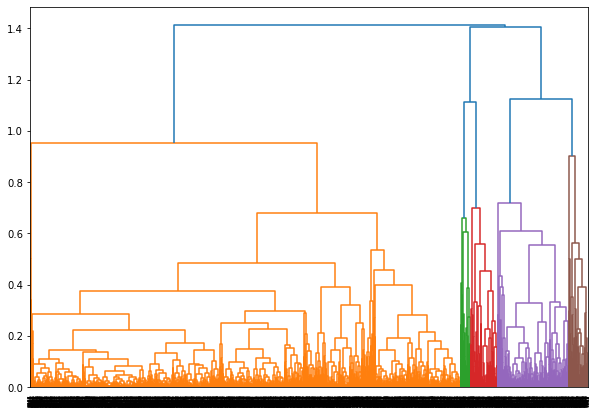

In [13]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))

In [38]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=4)

In [39]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    2738
3     579
1     453
2     229
Name: clustersid, dtype: int64

In [40]:
# Adding clusters to dataset
airline2['clustersid']=hclusters.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clustersid_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,2


In [41]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid_kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,87185.011687,170.754565,1.691381,1.009861,1.001461,10771.319211,10.123083,476.612126,1.419284,4046.725712,0.276844,1.676406
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720,0.949227
2,2,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004,2.938865
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043,0.005181


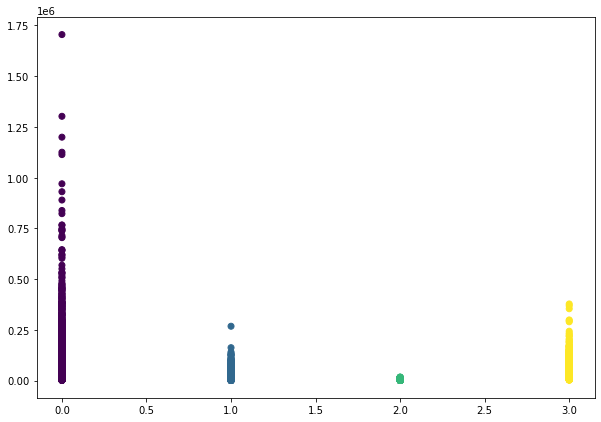

In [42]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_) 

In [21]:
from sklearn.cluster import KMeans

In [19]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

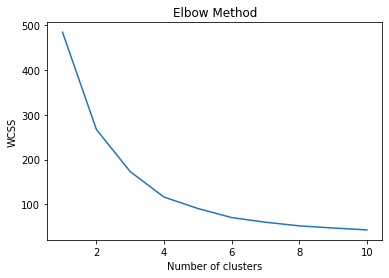

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using Elbow curve, we can go for 4 clusters

In [23]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(airline2_norm)

KMeans(n_clusters=4, random_state=42)

In [24]:
clusters_new.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [25]:
#Assign clusters to the data set
airline2['clustersid_kmeans']=clusters_new.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clustersid_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,4,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2


In [26]:
airline2.groupby('clustersid_kmeans').agg(['mean']).reset_index()

,clustersid_kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064,2.465138
1,1,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099,1.016484
2,2,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319,3.022145
3,3,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950,0.128099


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [28]:
array=airline2.values
array

array([[28143,     0,     1, ...,     0,     4,     2],
       [19244,     0,     1, ...,     0,     2,     2],
       [41354,     0,     1, ...,     0,     2,     2],
       ...,
       [73597,     0,     3, ...,     1,     2,     0],
       [54899,     0,     1, ...,     0,     4,     2],
       [ 3016,     0,     1, ...,     0,     2,     2]], dtype=int64)

In [32]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.25009890e+00,  6.03291446e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01,  6.03291446e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01,  6.03291446e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -4.30851168e-01, -1.49276632e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.25009890e+00,  6.03291446e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01,  6.03291446e-01]])

In [43]:
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=10)

In [44]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
airline2['clustersid_DBSCAN']=dbscan.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clustersid_kmeans,clustersid_DBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,0,0,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,2,0


In [51]:
airline2.groupby('clustersid_DBSCAN').agg(['mean']).reset_index()

,clustersid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clustersid_kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,202648.048110,1430.639175,2.615120,1.154639,1.168385,43776.762887,24.618557,3070.725086,8.969072,4650.745704,0.725086,0.704467,1.178694
1,0,57324.656082,35.875876,1.691134,1.000000,1.000000,9693.327010,8.814845,176.032165,0.522062,3812.647835,0.000000,0.504742,1.634227
2,1,75450.959843,57.479528,2.646457,1.000000,1.000000,25355.055118,13.926772,408.388976,1.270079,4584.420472,1.000000,0.958268,1.081890
3,2,40470.538462,0.000000,1.000000,2.000000,1.000000,8920.307692,13.000000,50.000000,0.307692,3759.000000,0.000000,0.153846,1.230769
